In [43]:
from glob import glob
import os
import mne
import numpy as np
import pandas
import matplotlib.pyplot as plt
import scipy.io
import sys
import h5py
from scipy.signal import filtfilt
from scipy import stats

In [3]:
mat=scipy.io.loadmat('EEG_raw.mat')

In [4]:
print(mat)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Fri Dec 13 19:56:37 2013', '__version__': '1.0', '__globals__': [], 'data': array([[-5.288e+00, -2.000e-02,  5.723e+00, ..., -1.123e+00, -1.094e+00,
        -1.040e+00],
       [ 7.212e+00, -5.942e+00, -1.792e+00, ..., -3.320e-01, -4.050e-01,
        -5.180e-01],
       [ 5.370e-01,  1.309e+00,  3.218e+00, ..., -2.000e-02,  1.000e-02,
         4.900e-02],
       ...,
       [ 6.963e+00, -5.684e+00,  3.452e+00, ..., -5.660e-01, -5.470e-01,
        -5.320e-01],
       [ 0.000e+00, -4.640e-01, -1.000e-02, ...,  4.880e-01,  4.880e-01,
         4.830e-01],
       [ 0.000e+00, -1.030e+00,  0.000e+00, ...,  1.000e-02,  5.000e-03,
         1.500e-02]])}


In [20]:
print(mat['data'])

[[-5.288e+00 -2.000e-02  5.723e+00 ... -1.123e+00 -1.094e+00 -1.040e+00]
 [ 7.212e+00 -5.942e+00 -1.792e+00 ... -3.320e-01 -4.050e-01 -5.180e-01]
 [ 5.370e-01  1.309e+00  3.218e+00 ... -2.000e-02  1.000e-02  4.900e-02]
 ...
 [ 6.963e+00 -5.684e+00  3.452e+00 ... -5.660e-01 -5.470e-01 -5.320e-01]
 [ 0.000e+00 -4.640e-01 -1.000e-02 ...  4.880e-01  4.880e-01  4.830e-01]
 [ 0.000e+00 -1.030e+00  0.000e+00 ...  1.000e-02  5.000e-03  1.500e-02]]


In [21]:
X=mat["data"]
print(X)
print(type(X))

[[-5.288e+00 -2.000e-02  5.723e+00 ... -1.123e+00 -1.094e+00 -1.040e+00]
 [ 7.212e+00 -5.942e+00 -1.792e+00 ... -3.320e-01 -4.050e-01 -5.180e-01]
 [ 5.370e-01  1.309e+00  3.218e+00 ... -2.000e-02  1.000e-02  4.900e-02]
 ...
 [ 6.963e+00 -5.684e+00  3.452e+00 ... -5.660e-01 -5.470e-01 -5.320e-01]
 [ 0.000e+00 -4.640e-01 -1.000e-02 ...  4.880e-01  4.880e-01  4.830e-01]
 [ 0.000e+00 -1.030e+00  0.000e+00 ...  1.000e-02  5.000e-03  1.500e-02]]
<class 'numpy.ndarray'>


In [22]:
X[0][1000]

-1.47

In [28]:
print(X.shape)

(49, 340000)


In [29]:
A=X[0]

In [30]:
A

array([-5.288, -0.02 ,  5.723, ..., -1.123, -1.094, -1.04 ])

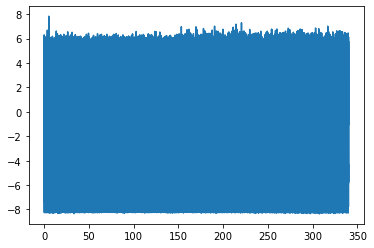

In [41]:
t=np.linspace(0,340,340000)
plt.plot(t,A)

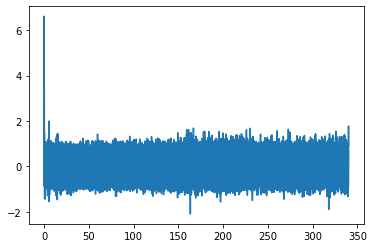

In [52]:
fs=1000
fl=1
fh=70
nyq=0.5*fs
l=fl/nyq
h=fh/nyq
order=2
b,a=scipy.signal.butter(order, [l,h], 'bandpass', analog=False)
y=scipy.signal.filtfilt(b,a,A,axis=0)
plt.plot(t,y)